In [48]:
import numpy as np
import pandas as pd

import yfinance as yf

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [4]:
stocks = input("Enter the code of the stock: ")
data = yf.download(stocks, "2008-01-01", "2023-03-03", auto_adjust=True)
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2008-01-02,848.700012,857.799988,846.400024,857.000000,130
2008-01-03,863.000000,865.500000,856.299988,866.400024,181
2008-01-04,861.400024,865.500000,860.200012,863.099976,28
2008-01-07,860.900024,860.900024,857.400024,859.599976,4
2008-01-08,861.599976,879.400024,861.599976,878.000000,21


In [8]:
data.describe()

,Open,High,Low,Close,Volume
count,3817.000000,3817.000000,3817.000000,3817.000000,3817.000000
mean,1384.668798,1392.010506,1376.776448,1384.479119,5441.373068
std,297.909190,299.193427,296.701317,298.001604,28793.201539
min,705.000000,715.500000,681.000000,704.900024,0.000000
25%,1202.000000,1207.900024,1196.199951,1201.500000,45.000000
50%,1312.199951,1318.099976,1308.000000,1312.699951,150.000000
75%,1659.199951,1666.099976,1647.699951,1659.099976,486.000000
max,2053.600098,2072.000000,2040.000000,2051.500000,386334.000000


In [9]:
data.shape

(3817, 5)

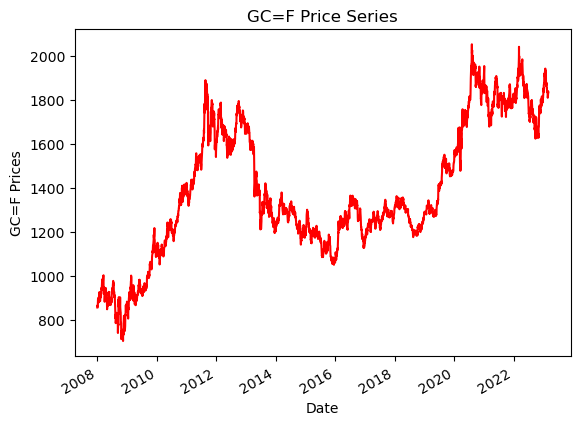

In [11]:
data.Close.plot(color='r')
plt.ylabel("{} Prices".format(stocks))
plt.title("{} Price Series".format(stocks))
plt.show()

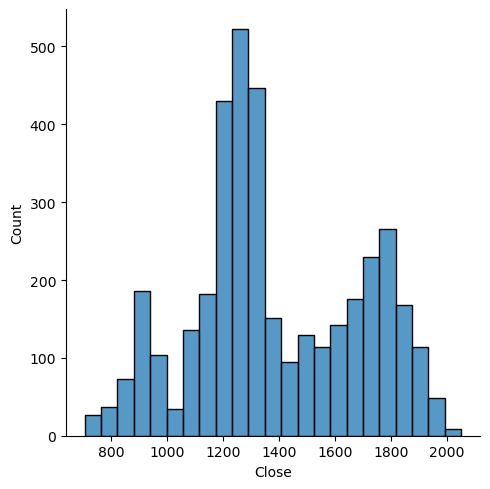

In [12]:
sns.displot(data["Close"])

### Not very normally distributed

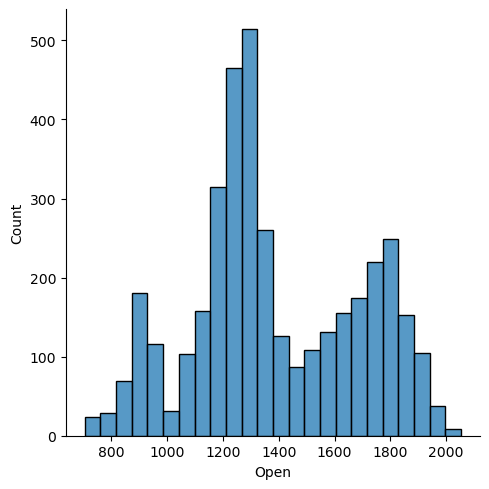

In [13]:
sns.displot(data["Open"])

In [15]:
X = data.drop("Close", axis=1)
y = data["Close"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lr = LinearRegression()

In [25]:
lr.fit(X_train, y_train)

LinearRegression()

In [34]:
prediction1 = lr.predict(X_test)

In [49]:
def calculate_metrics(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2_sc = r2_score(y_test, y_pred)
    
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R2 Score: {r2_sc}")
    
calculate_metrics(y_test, prediction1)

MSE: 26.459909846143116
RMSE: 5.143919696704364
R2 Score: 0.9997119580722555


In [50]:
from sklearn.linear_model import Lasso, Ridge

In [51]:
la = Lasso().fit(X_train, y_train)
ri = Ridge().fit(X_train, y_train)

la_p = la.predict(X_test)
ri_p = ri.predict(X_test)

/Users/aashutosh/opt/anaconda3/envs/general-env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.994e+04, tolerance: 2.687e+04
  model = cd_fast.enet_coordinate_descent(


In [52]:
calculate_metrics(y_test, la_p)
calculate_metrics(y_test, ri_p)

MSE: 75.95059916459184
RMSE: 8.714964094280127
R2 Score: 0.999173203645669
MSE: 26.459973563438105
RMSE: 5.143925890158032
R2 Score: 0.9997119573786306


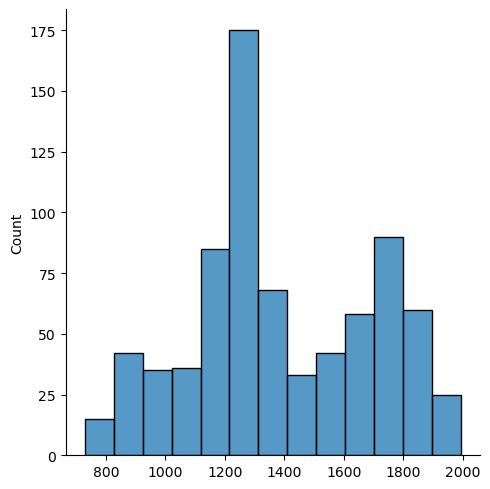

In [58]:
sns.displot(la_p)

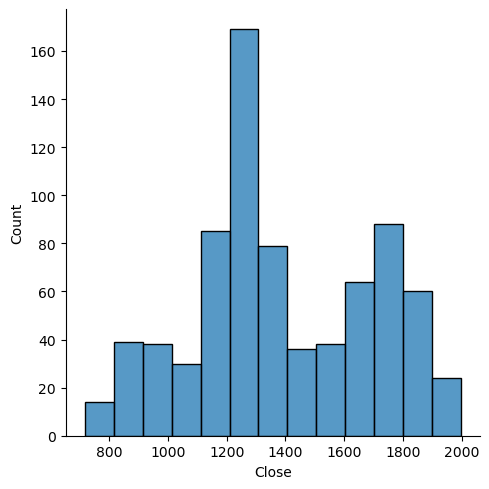

In [59]:
sns.displot(y_test)